Importing Libraries

In [259]:

import numpy as np
import pandas as pd
import re 
import tensorflow as tf
import seaborn as sns
# Load Text Cleaning Pkgs
import neattext.functions as nfx
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression

# Transformers
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [260]:
# Reeading CSV file 
data = pd.read_csv("/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Exit Test/tweet_emotions .csv")

In [261]:
# deading first 20 data
data.head(20)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [262]:
# list the columns
data.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [263]:
# Checking any null values present
data.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [264]:
# more details of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [265]:
# rows and columns
data.shape

(40000, 3)

In [266]:
# Value Counts
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='count', ylabel='sentiment'>

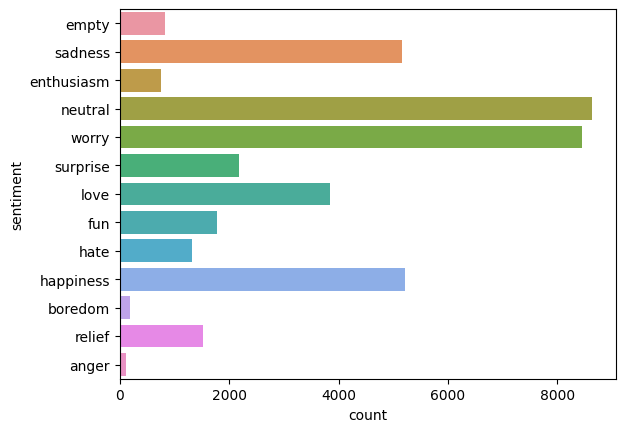

In [267]:
# Plot
sns.countplot(y='sentiment',data=data)

In [268]:
# removes pattern in the input text
# This function works to remove certain patterns in the text for preprocessing

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
# remove @user symbols

data['cleaned_content'] = np.vectorize(remove_pattern)(data['content'], "@[\w]*")

In [269]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [270]:
# User handles
data['cleaned_content'].apply(nfx.remove_userhandles)

0         i know  i was listenin to bad habit earlier a...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4         We want to trade with someone who has Houston...
                               ...                        
39995                                                     
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998     WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY ...
39999     bullet train from tokyo    the gf and i have ...
Name: cleaned_content, Length: 40000, dtype: object

In [271]:
data.head(20)

,tweet_id,sentiment,content,cleaned_content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Houston...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,Re-pinging : why didn't you go to prom? BC my ...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...","I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you,Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,I'm sorry at least it's Friday?


In [272]:
# remove special characters, numbers and punctuations if present

data['cleaned_content'] = data['cleaned_content'].str.replace("[^a-zA-Z#]", " ")

/tmp/ipykernel_20326/2752050232.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_content'] = data['cleaned_content'].str.replace("[^a-zA-Z#]", " ")


In [273]:
# Stopwords
data['cleaned_content'] = data['cleaned_content'].apply(nfx.remove_stopwords)

In [274]:
# Features & Labels
X = data['cleaned_content']
Y = data['sentiment']

In [275]:
#  Split Data
content_train,content_test,sentiment_train,sentiment_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [276]:
# Preprocessing the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content_train)
vocab_size = len(tokenizer.word_index) + 1

In [277]:
X_train = tokenizer.texts_to_sequences(content_train)
X_test = tokenizer.texts_to_sequences(content_test)

In [278]:
# max_sequence_length = 100
# X_train = pad_sequences(content_train, maxlen=max_sequence_length)
# X_test = pad_sequences(content_test, maxlen=max_sequence_length)

In [279]:
# Encoding emotions into numerical labels
label_encoder = LabelEncoder()
label_encoder.fit(sentiment_train)
y_train = label_encoder.transform(sentiment_train)
y_test = label_encoder.transform(sentiment_test)

In [280]:
# Convert the numerical labels into one-hot encodings
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [281]:
# Model Selection
embedding_dim = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


2023-06-18 13:53:11.368551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-18 13:53:11.370475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-18 13:53:11.371152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [282]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [283]:
# # Step 3: Model Training
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)